The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [58]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np

# Load the dataset and find the most common gender and birth country
nobel_df=pd.read_csv("nobel.csv")

top_gender=nobel_df["sex"].value_counts().index[0]
top_country=nobel_df["birth_country"].value_counts().index[0]
print(f"The gender with the most Nobel laureates is --> {top_gender}")
print(f"The most common birth country of Nobel laureates is --> {top_country}\n")


The gender with the most Nobel laureates is --> Male
The most common birth country of Nobel laureates is --> United States of America



The highest proportion of US-born winners : 2000


Text(0.5, 1.05, 'USA Winners')

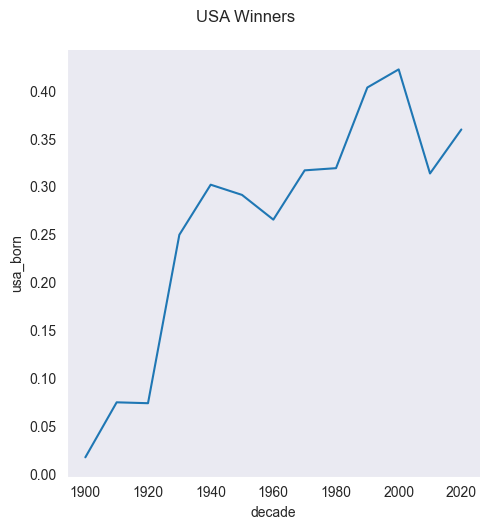

In [59]:
# Identify the decade with the highest proportion of US-born winners
nobel_df["usa_born"]=nobel_df["birth_country"]=="United States of America"
nobel_df["decade"]=(np.floor(nobel_df['year']/10)*10).astype(int)
prop_usa=nobel_df.groupby("decade", as_index=False)['usa_born'].mean()

max_decade_usa=prop_usa[prop_usa["usa_born"]==prop_usa["usa_born"].max()]['decade'].values[0]
print(f"The highest proportion of US-born winners : {max_decade_usa}")

# Relational line plot
g=sns.relplot(x="decade",y="usa_born",kind="line",data=prop_usa)
g.fig.suptitle("USA Winners",y=1.05)

The most female winners : [2020 'Literature']


Text(0.5, 1.05, 'Female Winners')

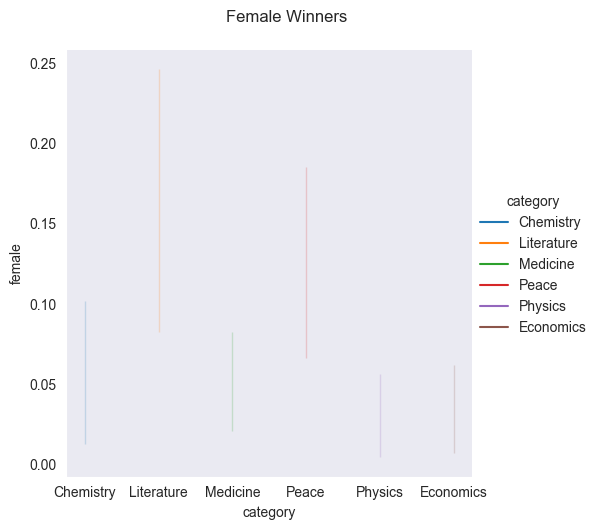

In [60]:
# Find the decade and category with the highest proportion of female laureates
nobel_df["female"] = nobel_df["sex"] == "Female"
female_winner = nobel_df.groupby(["decade","category"], as_index = False)['female'].mean()

max_female_dict = female_winner[female_winner["female"] == female_winner['female'].max()][['decade','category']].values[0]
print(f"The most female winners : {max_female_dict}")

# Relational line plot
g=sns.relplot(x="category",y="female",kind="line",data=female_winner,hue="category")
g.fig.suptitle("Female Winners",y=1.05)

In [81]:
# Find first woman to win a Nobel Prize
nobel_women = nobel_df[nobel_df['female']]
first_year = nobel_women[nobel_women['year'] == nobel_women['year'].min()]
first_woman_name = first_year['full_name'].values[0]
first_woman_category = first_year['category'].values[0]
print(f"\n The first woman to win a Nobel Prize was {first_woman_name}, in the category of {first_woman_category}.")



 The first woman to win a Nobel Prize was Marie Curie, née Sklodowska, in the category of Physics.


In [101]:
# Determine repeat winners
counts=nobel_df['full_name'].value_counts()
repeat=list(counts[counts>=2].index)
print("\n The repeat winners are :", repeat)


 The repeat winners are : ['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']
